In [291]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

In [292]:
%matplotlib inline

In [293]:
rmp=pd.read_csv('schools.csv')

In [294]:
forbes=pd.read_csv('forbesinfo.csv')

In [296]:
rmp['date'] = pd.to_datetime(rmp['date'],infer_datetime_format=True)


In [297]:
rmp['overall'] = (rmp['facilities']+rmp['food']+rmp['happiness']+rmp['internet']+rmp['location']+rmp['opportunities']+\
                rmp['clubs']+rmp['reputation']+rmp['social'])/9

In [298]:
forbes.head()

,ACT,SAT,in_state_tuition,out_state_tuition,percent_admitted,percent_fin_aid,rank,school,sf_ratio,student_population,total_cost,undergrad_population
0,31-34,1380-1570,"$45,195","$45,195",5%,68%,#1,Stanford University,10,"16,963","$64,477","7,019"
1,31-34,1350-1560,"$48,310","$48,310",19%,61%,#2,Williams College,6,"2,126","$66,240","2,072"
2,31-35,1400-1600,"$41,820","$41,820",7%,62%,#3,Princeton University,6,"8,088","$61,160","5,391"
3,32-35,1410-1600,"$43,938","$43,938",6%,72%,#4,Harvard University,8,"28,791","$64,400","10,338"
4,33-35,1420-1570,"$45,016","$45,016",8%,89%,#5,Massachusetts Institute of Technology,8,"11,319","$63,250","4,512"


In [299]:
forbes['ACT_lower']=forbes['ACT'].str.split('-').str[0]
forbes['ACT_upper']=forbes['ACT'].str.split('-').str[1]
forbes['SAT_lower']=forbes['SAT'].str.split('-').str[0]
forbes['SAT_upper']=forbes['SAT'].str.split('-').str[1]



In [300]:
forbes=forbes.drop('ACT',1).drop('SAT',1)

In [301]:
#for x in ['out_state_tuition','in_state_tuition','percent_admitted','percent_fin_aid','rank','ACT_lower',
#         'ACT_upper', 'SAT_lower', 'SAT_upper','total_cost', ]:
for x in forbes:
    try:
        forbes[x]=pd.to_numeric(forbes[x].str.replace(',', '').str.replace('$', '').str.replace(
        '#', '').str.replace('%',''))
    except:
        pass
    

In [302]:
forbes['ACT_mid']=(forbes['ACT_lower']+forbes['ACT_upper'])/2

In [303]:
forbes['SAT_mid']=(forbes['SAT_lower']+forbes['SAT_upper'])/2

In [304]:
rmp.head()

,clubs,date,facilities,food,happiness,helpful,internet,location,opportunities,rank,reputation,school,social,unhelpful,overall
0,5,2017-06-22,4,4,4,1,5,4,5,1,5,Stanford University,3,0,4.333333
1,3,2016-12-13,4,4,5,2,4,4,4,1,5,Stanford University,5,4,4.222222
2,3,2016-11-11,5,3,4,1,4,4,5,1,5,Stanford University,5,3,4.222222
3,4,2016-10-16,5,5,5,1,4,5,5,1,5,Stanford University,5,3,4.777778
4,4,2016-09-03,4,3,4,4,4,4,5,1,4,Stanford University,4,8,4.000000


In [611]:
rmp_help=rmp[rmp['helpful']+rmp['unhelpful']>10]
rmp_help=rmp_help.reset_index()

In [612]:
rmp_help['help_ratio']=rmp_help['helpful']/(rmp_help['helpful']+rmp_help['unhelpful'])

In [613]:
rmp_help.head()


,index,clubs,date,facilities,food,happiness,helpful,internet,location,opportunities,rank,reputation,school,social,unhelpful,overall,year,month,help_ratio
0,4,4,2016-09-03,4,3,4,4,4,4,5,1,4,Stanford University,4,8,4.000000,2016,9,0.333333
1,5,5,2016-08-07,5,5,3,7,2,4,3,1,3,Stanford University,5,17,3.888889,2016,8,0.291667
2,6,5,2016-08-07,5,5,5,18,5,5,5,1,5,Stanford University,5,11,5.000000,2016,8,0.620690
3,10,3,2016-02-21,4,4,4,16,5,4,5,1,5,Stanford University,3,14,4.111111,2016,2,0.533333
4,14,5,2015-11-24,5,4,5,20,5,5,5,1,5,Stanford University,5,5,4.888889,2015,11,0.800000


In [626]:
def help_category(c):
    if c['help_ratio'] > .8:
        return 'Really helpful'
    elif c['help_ratio'] > .6:
        return 'Slightly helpful'
    elif c['help_ratio'] >.4:
        return 'Neutral'
    elif c['help_ratio']>.2:
        return 'Slightly unhelpful'
    else:
        return 'Really unhelpful'

In [627]:
rmp_help['help_class'] = rmp_help.apply(help_category, axis=1)

In [628]:
rmp_help.head()

,index,clubs,date,facilities,food,happiness,helpful,internet,location,opportunities,...,reputation,school,social,unhelpful,overall,year,month,help_ratio,alert,help_class
0,4,4,2016-09-03,4,3,4,4,4,4,5,...,4,Stanford University,4,8,4.000000,2016,9,0.333333,Neutral,Slightly unhelpful
1,5,5,2016-08-07,5,5,3,7,2,4,3,...,3,Stanford University,5,17,3.888889,2016,8,0.291667,Unhelpful,Slightly unhelpful
2,6,5,2016-08-07,5,5,5,18,5,5,5,...,5,Stanford University,5,11,5.000000,2016,8,0.620690,Neutral,Slightly helpful
3,10,3,2016-02-21,4,4,4,16,5,4,5,...,5,Stanford University,3,14,4.111111,2016,2,0.533333,Neutral,Neutral
4,14,5,2015-11-24,5,4,5,20,5,5,5,...,5,Stanford University,5,5,4.888889,2015,11,0.800000,Helpful,Slightly helpful


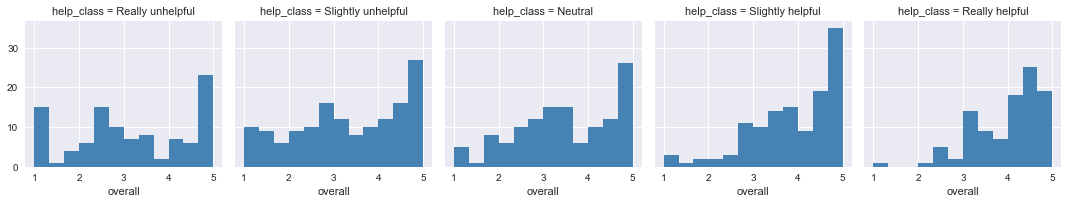

In [631]:
g = sns.FacetGrid(rmp_help, col="help_class", margin_titles=True,\
                  col_order=['Really unhelpful', 'Slightly unhelpful', 'Neutral', 'Slightly helpful', 'Really helpful'])
bins = np.linspace(1, 5, 13)
g.map(plt.hist, "overall", color="steelblue", bins=bins, lw=0)

In [307]:
a= rmp[['clubs','facilities','food','internet','location','reputation',
        'opportunities','happiness','overall']].mean().sort_values()
a

food             3.662686
internet         3.862013
happiness        4.076647
location         4.080664
overall          4.211197
clubs            4.323852
facilities       4.400391
opportunities    4.416893
reputation       4.642493
dtype: float64

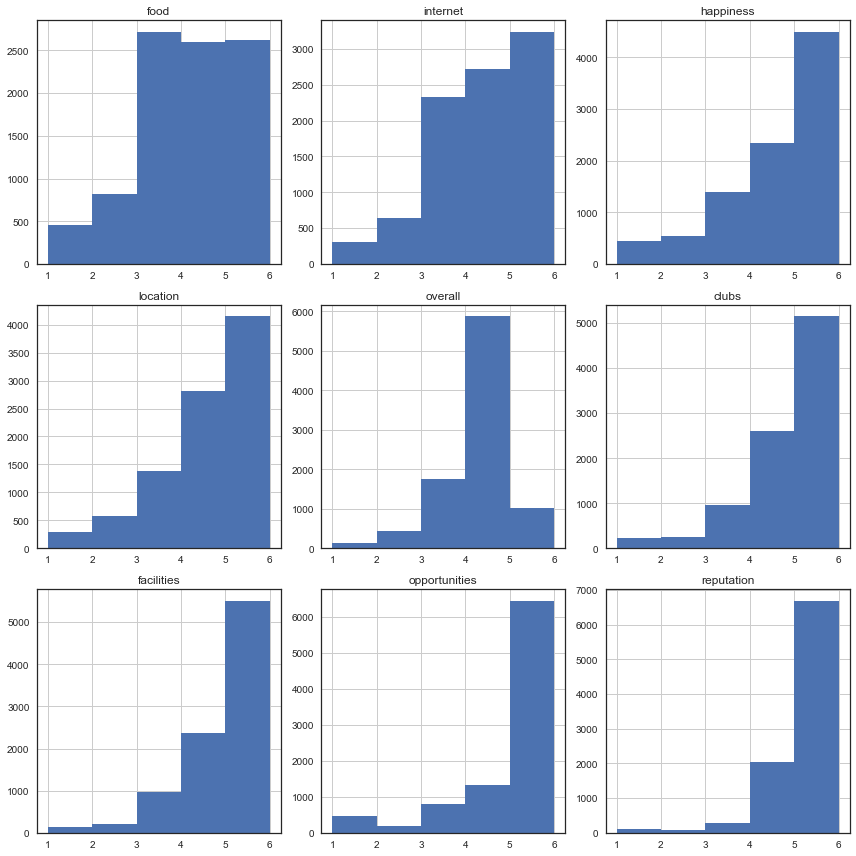

In [308]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(12,12))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax, bins=range(1,7))
        ax.set_title(var_name)
        plt.xticks(np.arange(1,7, 1.0))
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


draw_histograms(rmp, a.index, 3, 3)

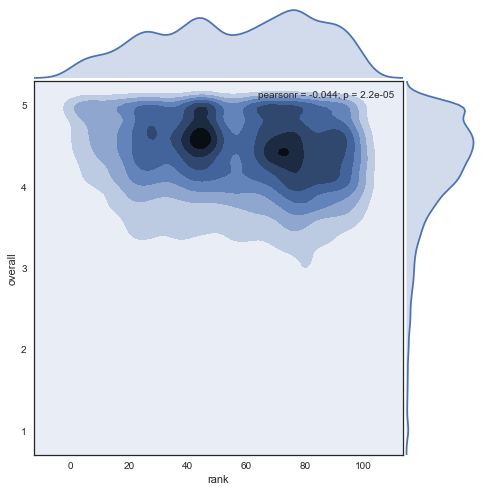

In [309]:
sns.set(style="white")
g = sns.jointplot(rmp['rank'], rmp['overall'], kind="kde", size=7, space=0)


In [310]:
b= rmp[['clubs','facilities','food','internet','location','reputation',
        'opportunities','happiness','overall']].std().sort_values()
b


reputation       0.693989
overall          0.703993
facilities       0.877970
clubs            0.944781
location         1.060753
internet         1.075924
opportunities    1.076404
food             1.126474
happiness        1.138312
dtype: float64

In [326]:
forbes.columns

Index(['in_state_tuition', 'out_state_tuition', 'percent_admitted',
       'percent_fin_aid', 'rank', 'school', 'sf_ratio', 'student_population',
       'total_cost', 'undergrad_population', 'ACT_lower', 'ACT_upper',
       'SAT_lower', 'SAT_upper', 'ACT_mid', 'SAT_mid'],
      dtype='object')

In [327]:
merged=forbes.merge(rmp, on='rank')
merged.head()

,in_state_tuition,out_state_tuition,percent_admitted,percent_fin_aid,rank,school_x,sf_ratio,student_population,total_cost,undergrad_population,...,happiness,helpful,internet,location,opportunities,reputation,school_y,social,unhelpful,overall
0,45195,45195,5,68,1,Stanford University,10,16963,64477,7019,...,4,1,5,4,5,5,Stanford University,3,0,4.333333
1,45195,45195,5,68,1,Stanford University,10,16963,64477,7019,...,5,2,4,4,4,5,Stanford University,5,4,4.222222
2,45195,45195,5,68,1,Stanford University,10,16963,64477,7019,...,4,1,4,4,5,5,Stanford University,5,3,4.222222
3,45195,45195,5,68,1,Stanford University,10,16963,64477,7019,...,5,1,4,5,5,5,Stanford University,5,3,4.777778
4,45195,45195,5,68,1,Stanford University,10,16963,64477,7019,...,4,4,4,4,5,4,Stanford University,4,8,4.000000


In [330]:
group=rmp.groupby('school').mean().reset_index()

In [333]:
group['rank']=pd.to_numeric(group['rank'], downcast='signed')


,school,clubs,facilities,food,happiness,helpful,internet,location,opportunities,rank,reputation,social,unhelpful,overall
0,Amherst College,3.720000,4.400000,3.040000,4.080000,1.320000,4.040000,4.000000,4.760000,12,5.000000,3.400000,0.840000,4.048889
1,Barnard College,4.000000,4.250000,3.500000,4.166667,0.833333,3.833333,4.833333,4.416667,37,4.833333,3.916667,1.250000,4.194444
2,Bates College,4.467742,4.354839,4.741935,4.435484,1.403226,3.919355,3.451613,4.661290,52,4.677419,4.500000,0.370968,4.356631
3,Boston College,3.964286,4.375000,3.517857,3.875000,0.910714,3.928571,4.303571,4.142857,22,4.535714,4.160714,0.821429,4.089286
4,Boston University,4.125000,3.600000,3.820000,3.815000,2.455000,3.775000,4.495000,4.050000,79,4.255000,3.830000,2.115000,3.973889


In [335]:
merged=forbes.merge(group, on='rank')
merged.head()

,in_state_tuition,out_state_tuition,percent_admitted,percent_fin_aid,rank,school_x,sf_ratio,student_population,total_cost,undergrad_population,...,food,happiness,helpful,internet,location,opportunities,reputation,social,unhelpful,overall
0,45195,45195,5,68,1,Stanford University,10,16963,64477,7019,...,3.782609,4.014493,6.173913,4.231884,4.260870,4.202899,4.637681,4.304348,6.173913,4.225443
1,48310,48310,19,61,2,Williams College,6,2126,66240,2072,...,3.600000,4.266667,1.533333,4.333333,3.600000,4.600000,4.933333,3.800000,2.533333,4.185185
2,41820,41820,7,62,3,Princeton University,6,8088,61160,5391,...,4.184211,4.236842,3.789474,3.973684,4.236842,4.421053,4.657895,4.315789,4.763158,4.289474
3,43938,43938,6,72,4,Harvard University,8,28791,64400,10338,...,3.200000,3.166667,14.783333,3.433333,3.433333,3.566667,4.150000,3.433333,12.733333,3.514815
4,45016,45016,8,89,5,Massachusetts Institute of Technology,8,11319,63250,4512,...,3.236842,3.473684,6.263158,4.263158,4.052632,4.105263,4.315789,3.657895,8.026316,3.883041


In [341]:
merged[['school_x','school_y']][merged['school_x']!=merged['school_y']]

,school_x,school_y
37,College of William & Mary,College of William and Mary
39,"University of California, Berkeley",University of California Berkeley
43,"University of Michigan, Ann Arbor",University of Michigan
45,"University of California, Los Angeles",University of California Los Angeles (UCLA)
46,"University of North Carolina, Chapel Hill",University of North Carolina at Chapel Hill
68,"University of Wisconsin, Madison",University of Wisconsin - Madison
70,Union College (NY),Union College
71,"University of Illinois, Urbana-Champaign",University Of Illinois at Urbana-Champaign
81,"University of Maryland, College Park",University of Maryland
83,Trinity College (CT),Trinity College


In [343]:
merged.sort_values('location').head()

,school,clubs,facilities,food,happiness,helpful,internet,location,opportunities,rank,reputation,social,unhelpful,overall
64,Trinity College,4.066667,4.500000,3.016667,4.116667,1.166667,3.216667,2.950000,4.316667,84.0,4.283333,4.516667,0.566667,3.887037
35,Grinnell College,4.050000,4.483333,3.716667,4.333333,0.650000,3.766667,2.966667,4.566667,73.0,4.466667,4.400000,0.383333,4.083333
50,Oberlin College,3.792453,4.641509,3.377358,4.075472,2.584906,3.735849,2.981132,4.471698,43.0,4.641509,4.547170,2.886792,4.029350
36,Hamilton College,4.292308,4.215385,3.676923,4.200000,0.353846,4.292308,3.076923,4.569231,50.0,4.738462,4.400000,0.246154,4.162393
29,Dickinson College,3.924528,4.566038,3.415094,3.773585,0.716981,3.528302,3.169811,4.320755,80.0,4.415094,4.188679,0.396226,3.922432


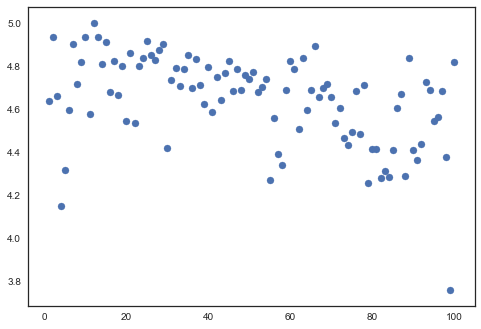

In [345]:
plt.scatter(merged['rank'],merged['reputation'])

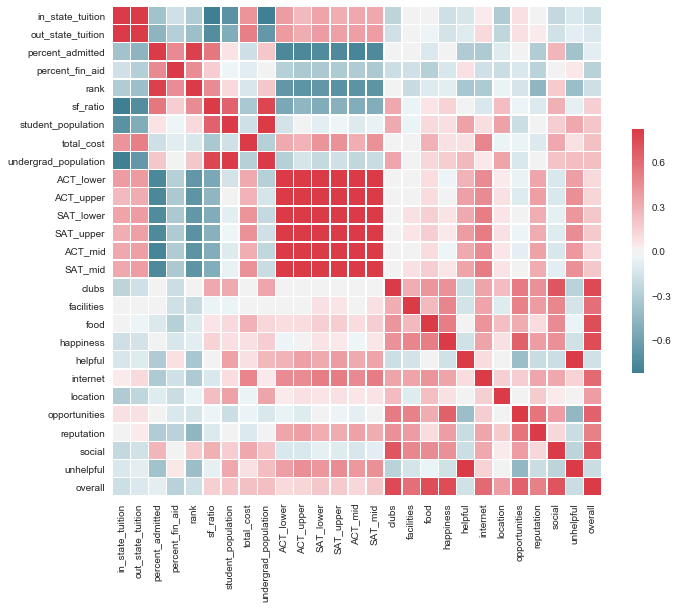

In [358]:
corr = merged.corr()
# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

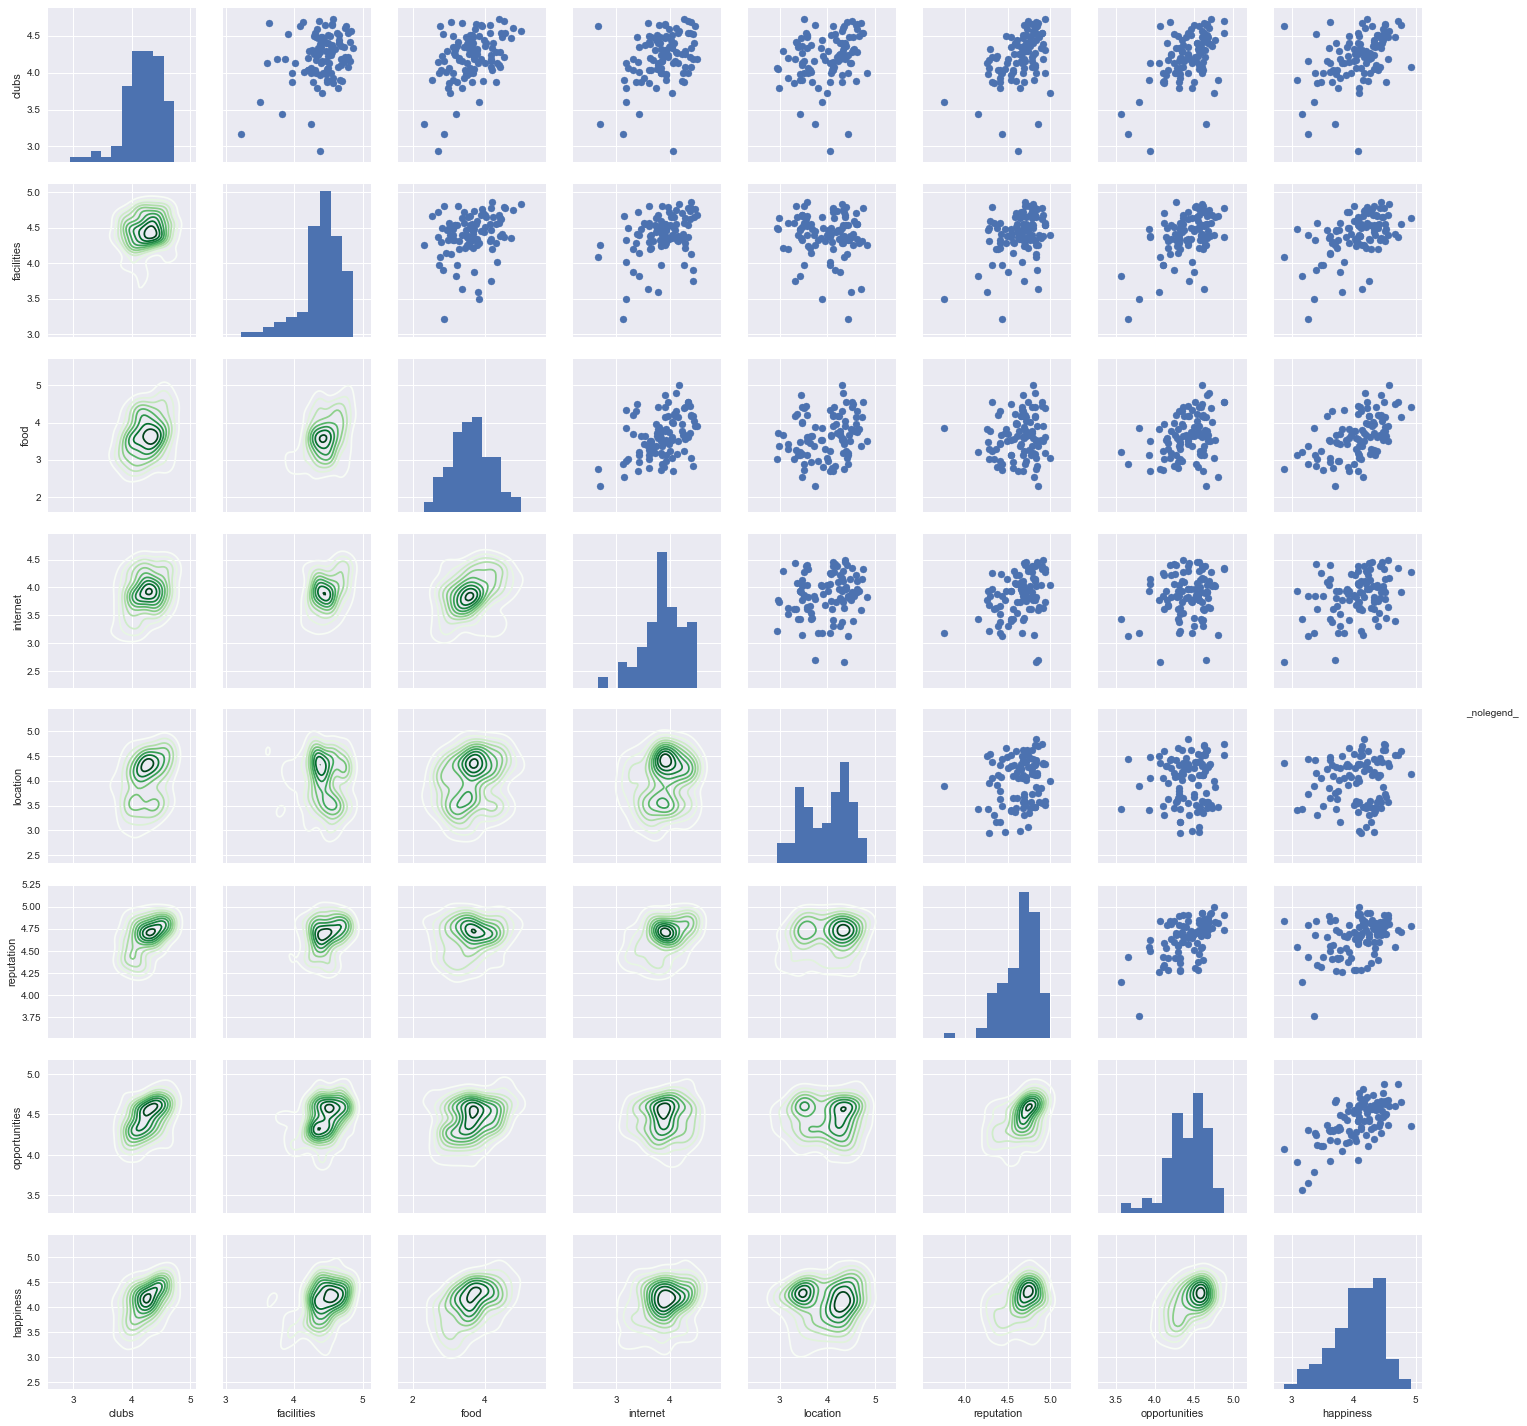

In [400]:
g = sns.PairGrid(merged[['clubs','facilities','food','internet','location','reputation','opportunities','happiness']], palette='Set2',\
                 hue_kws={'cmap':['Greens','Oranges','Blues']})

g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.add_legend()


In [367]:
merged.head()

,in_state_tuition,out_state_tuition,percent_admitted,percent_fin_aid,rank,school_x,sf_ratio,student_population,total_cost,undergrad_population,...,food,happiness,helpful,internet,location,opportunities,reputation,social,unhelpful,overall
0,45195,45195,5,68,1,Stanford University,10,16963,64477,7019,...,3.782609,4.014493,6.173913,4.231884,4.260870,4.202899,4.637681,4.304348,6.173913,4.225443
1,48310,48310,19,61,2,Williams College,6,2126,66240,2072,...,3.600000,4.266667,1.533333,4.333333,3.600000,4.600000,4.933333,3.800000,2.533333,4.185185
2,41820,41820,7,62,3,Princeton University,6,8088,61160,5391,...,4.184211,4.236842,3.789474,3.973684,4.236842,4.421053,4.657895,4.315789,4.763158,4.289474
3,43938,43938,6,72,4,Harvard University,8,28791,64400,10338,...,3.200000,3.166667,14.783333,3.433333,3.433333,3.566667,4.150000,3.433333,12.733333,3.514815
4,45016,45016,8,89,5,Massachusetts Institute of Technology,8,11319,63250,4512,...,3.236842,3.473684,6.263158,4.263158,4.052632,4.105263,4.315789,3.657895,8.026316,3.883041


In [375]:
scatter_df = merged[['food', 'internet']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

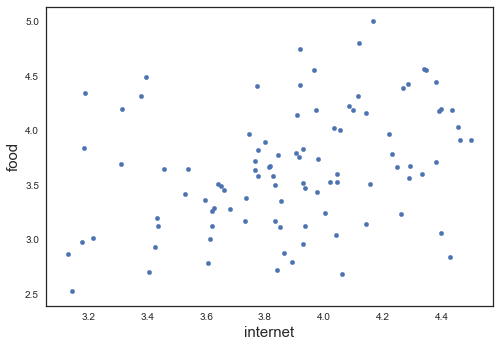

In [376]:
scatter_df.plot.scatter(x='internet', y='food')

In [586]:
x="clubs"
y="happiness"

# x="total_cost"
# y="sf_ratio"

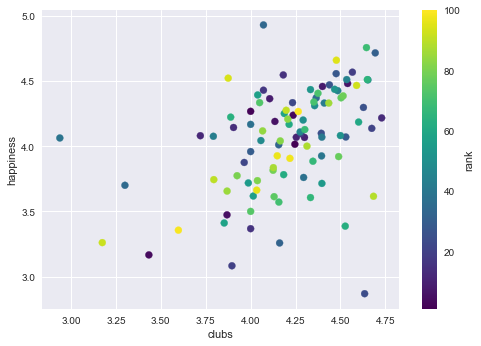

In [587]:


plt.scatter(x=merged[x], y = merged[y],
            c = merged['rank'], cmap="viridis")
ax = plt.gca()

plt.colorbar(label="rank")
plt.xlabel(x)
plt.ylabel(y)


#make a legend:
# pws = [0.5, 1, 1.5, 2., 2.5]
# for pw in pws:
#     plt.scatter([], [], s=(pw**2)*60, c="k",label=str(pw))

#h, l = plt.gca().get_legend_handles_labels()
# plt.legend(h[1:], l[1:], labelspacing=1.2, borderpad=1, 
#             frameon=True, framealpha=0.6, edgecolor="k", facecolor="w")

In [433]:
print(merged.sort_values('clubs').head()['school_x'].values[:])

['California Institute of Technology' 'Cooper Union'
 'United States Air Force Academy' 'Harvard University'
 'Occidental College']


In [413]:
forbes.head()

,in_state_tuition,out_state_tuition,percent_admitted,percent_fin_aid,rank,school,sf_ratio,student_population,total_cost,undergrad_population,ACT_lower,ACT_upper,SAT_lower,SAT_upper,ACT_mid,SAT_mid
0,45195,45195,5,68,1,Stanford University,10,16963,64477,7019,31,34,1380,1570,32.5,1475.0
1,48310,48310,19,61,2,Williams College,6,2126,66240,2072,31,34,1350,1560,32.5,1455.0
2,41820,41820,7,62,3,Princeton University,6,8088,61160,5391,31,35,1400,1600,33.0,1500.0
3,43938,43938,6,72,4,Harvard University,8,28791,64400,10338,32,35,1410,1600,33.5,1505.0
4,45016,45016,8,89,5,Massachusetts Institute of Technology,8,11319,63250,4512,33,35,1420,1570,34.0,1495.0


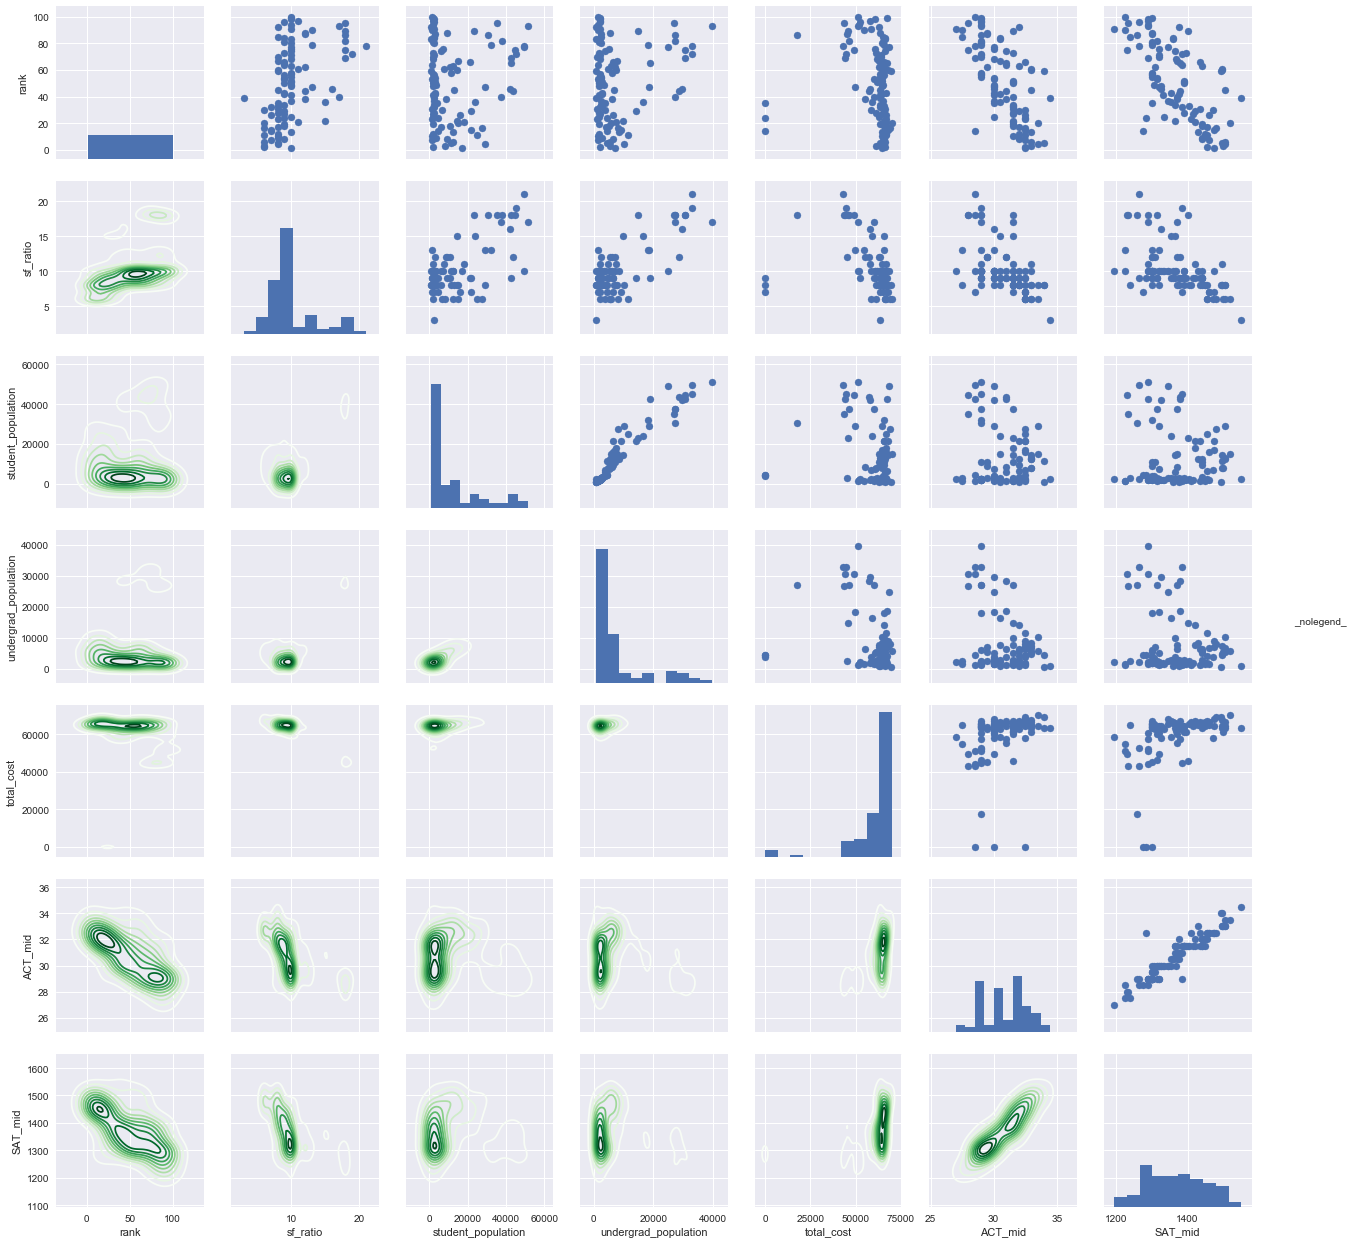

In [416]:
g = sns.PairGrid(forbes[['rank','sf_ratio','student_population','undergrad_population','total_cost','ACT_mid','SAT_mid']], palette='Set2',\
                 hue_kws={'cmap':['Greens','Oranges','Blues']})

g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.add_legend()


In [444]:
rmp.head()

,clubs,date,facilities,food,happiness,helpful,internet,location,opportunities,rank,reputation,school,social,unhelpful,overall
0,5,2017-06-22,4,4,4,1,5,4,5,1,5,Stanford University,3,0,4.333333
1,3,2016-12-13,4,4,5,2,4,4,4,1,5,Stanford University,5,4,4.222222
2,3,2016-11-11,5,3,4,1,4,4,5,1,5,Stanford University,5,3,4.222222
3,4,2016-10-16,5,5,5,1,4,5,5,1,5,Stanford University,5,3,4.777778
4,4,2016-09-03,4,3,4,4,4,4,5,1,4,Stanford University,4,8,4.000000


In [460]:
rmp['year']=rmp['date'].dt.year
rmp['month'] = rmp['date'].dt.month


In [465]:
rmp_year=rmp.groupby('year').mean().reset_index()

In [482]:
rmp_year

,year,clubs,facilities,food,happiness,helpful,internet,location,opportunities,rank,reputation,social,unhelpful,overall,month
0,2010,4.375650,4.415193,3.592092,3.970864,0.137357,3.988554,4.058273,4.629553,51.073881,4.679501,4.611863,0.158169,4.257949,8.357960
1,2011,4.369620,4.488608,3.587342,3.959494,0.172996,4.042194,3.918143,4.594937,51.190717,4.622785,4.612658,0.243038,4.243976,6.933333
2,2012,4.324775,4.485237,3.589217,3.984596,0.499358,4.041078,4.062901,4.553273,50.700899,4.646983,4.589217,0.580231,4.253031,6.417202
3,2013,4.476900,4.548435,3.894188,4.157973,0.991058,4.067064,4.309985,4.555887,53.640835,4.688525,4.619970,0.903130,4.368770,7.420268
4,2014,4.378157,4.405303,3.724747,4.136364,2.405934,3.830808,4.157828,4.357955,57.407828,4.666035,4.552399,1.943813,4.245511,8.962121
5,2015,4.282172,4.354191,3.642267,4.073200,3.529516,3.671783,4.053719,4.241440,58.376033,4.610980,4.362456,2.639315,4.143579,7.025974
6,2016,4.257960,4.354126,3.666017,4.182586,2.287849,3.747238,4.094217,4.328785,61.352827,4.636777,4.217024,1.880442,4.164970,6.842755
7,2017,4.171679,4.221805,3.650376,4.083960,1.718045,3.781955,4.051378,4.305764,61.251880,4.615288,3.994987,1.140351,4.097466,3.738095


In [576]:
rmp_year1=rmp_year[['year','clubs','facilities','food','happiness','internet','location','opportunities','overall']].set_index('year')

In [577]:
rmp_year1=rmp_year1.stack().reset_index()

In [578]:
rmp_year1.head()

,year,level_1,0
0,2010,clubs,4.375650
1,2010,facilities,4.415193
2,2010,food,3.592092
3,2010,happiness,3.970864
4,2010,internet,3.988554


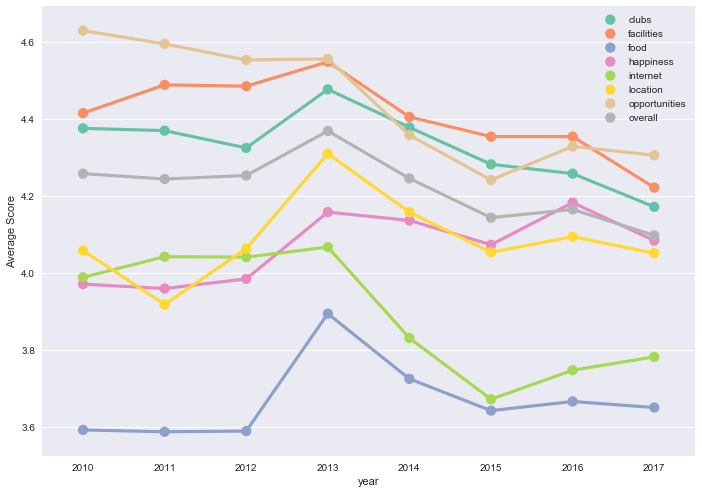

In [583]:
from matplotlib import pyplot
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.pointplot(x='year', y=0, hue='level_1', data=rmp_year1, palette="Set2")
plt.legend(loc='upper right')
plt.ylabel('Average Score')



In [580]:
rmp_month=rmp.groupby('month').mean()\
.reset_index()[['month','clubs','facilities','food','happiness','internet','location','opportunities','overall']]\
.set_index('month').stack().reset_index()

(3.5, 4.9)

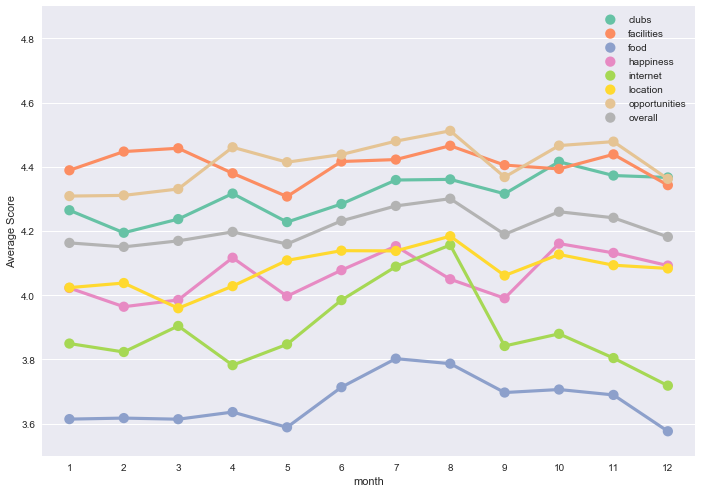

In [582]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.pointplot(x='month', y=0, hue='level_1', data=rmp_month, palette="Set2")
plt.legend(loc='upper right')
plt.ylabel('Average Score')
plt.ylim((3.5,4.9))